In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score   
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle
import sklearn

In [2]:
print(sklearn.__version__)

1.5.1


In [3]:
#parth
circuits = pd.read_csv(r"archive/circuits.csv")
constructor_results = pd.read_csv(r"archive/constructor_results.csv")
constructor_standings = pd.read_csv(r"archive/constructor_standings.csv")
constructors = pd.read_csv(r"archive/constructors.csv")
driver_standings = pd.read_csv(r"archive/driver_standings.csv")
drivers = pd.read_csv(r"archive/drivers.csv")
lap_times = pd.read_csv(r"archive/lap_times.csv")


#me
pit_stops = pd.read_csv(r"archive/pit_stops.csv")
qualifying = pd.read_csv(r"archive/qualifying.csv")
races = pd.read_csv(r"archive/races.csv")
results = pd.read_csv(r"archive/results.csv")
seasons = pd.read_csv(r"archive/seasons.csv")
sprint_results = pd.read_csv(r"archive/sprint_results.csv")
status = pd.read_csv(r"archive/status.csv")

In [4]:
circuits.replace('\\N', np.nan, inplace=True)
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [5]:
constructor_results.replace('\\N', np.nan, inplace=True)
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,NaN
1,2,18,2,8.0,NaN
2,3,18,3,9.0,NaN
3,4,18,4,5.0,NaN
4,5,18,5,2.0,NaN


In [6]:
constructor_standings.replace('\\N', np.nan, inplace=True)
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [7]:
#No Use in modelling
constructors.replace('\\N', np.nan, inplace=True)

constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [8]:
driver_standings.replace('\\N', np.nan, inplace=True)
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [9]:
drivers.replace('\\N', np.nan, inplace=True)
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [10]:
lap_times.replace('\\N', np.nan, inplace=True)
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [11]:
pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [12]:
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [13]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [14]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [15]:
seasons.head()

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


In [16]:
sprint_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


In [17]:
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [18]:
qualifying.isnull().sum()

qualifyId         0
raceId            0
driverId          0
constructorId     0
number            0
position          0
q1                0
q2               13
q3               27
dtype: int64

In [19]:
results['position'] = results['position'].replace('\\N', 0)
results['milliseconds'] = results['milliseconds'].replace('\\N', 0)
results['fastestLapTime'] = results['fastestLapTime'].replace('\\N', 0)
results['fastestLapSpeed'] = results['fastestLapSpeed'].replace('\\N', 0)


results['position'] = results['position'].astype(int)
results['milliseconds'] = results['milliseconds'].astype(float)
results['fastestLapSpeed'] = results['fastestLapSpeed'].astype(float)


results['milliseconds'] = results['milliseconds'] / 1000
results = results.rename(columns={'milliseconds': 'seconds'})

In [20]:
results = results.merge(races[['raceId', 'date', 'circuitId']], on='raceId')

In [21]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,seconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,date,circuitId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690.616,39,2,1:27.452,218.300,1,2008-03-16,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696.094,41,3,1:27.739,217.586,1,2008-03-16,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698.779,41,5,1:28.090,216.719,1,2008-03-16,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707.797,58,7,1:28.603,215.464,1,2008-03-16,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708.630,43,1,1:27.418,218.385,1,2008-03-16,1


In [22]:
def convert_to_seconds(time_str):
    if pd.isnull(time_str):
        return np.nan
    minutes, seconds = time_str.split(':')
    total_seconds = int(minutes) * 60 + float(seconds)
    return total_seconds

columns = ['q1', 'q2', 'q3']

for column in columns:
    qualifying[column] = qualifying[column].replace('\\N', np.nan)
    qualifying[column] = qualifying[column].apply(convert_to_seconds)

qualifying['Qualifying Time'] = qualifying[['q1', 'q2', 'q3']].mean(axis=1).round(3)

In [23]:
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,Qualifying Time
0,1,18,1,1,22,1,86.572,85.187,86.714,86.158
1,2,18,9,2,4,2,86.103,85.315,86.869,86.096
2,3,18,5,1,23,3,85.664,85.452,87.079,86.065
3,4,18,13,6,2,4,85.994,85.691,87.178,86.288
4,5,18,2,2,3,5,85.960,85.518,87.236,86.238


In [24]:
drivers['age']=2024-(drivers['dob'].str[:4].astype(int))
driver_age=drivers.drop(columns=['driverRef','number','code','forename','surname','dob','nationality','url'])

In [25]:
drivers['Name'] = drivers['forename'] + ' ' + drivers['surname']

In [26]:
dummy_driver = {
    'driverId': 999,
    'driverRef': 'dummy',
    'number': 0,
    'code': 'DUM',
    'forename': 'Dummy',
    'surname': 'Driver',
    'dob': '2000-01-01',
    'nationality': 'None',
    'url': '',
    'age': 0,
    'Name': 'Dummy Driver'
}
drivers = pd.concat([drivers, pd.DataFrame([dummy_driver])], ignore_index=True)

In [27]:
drivers.to_csv("drivers.csv",index=False)

In [28]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,age,Name
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,39,Lewis Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,47,Nick Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,39,Nico Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,43,Fernando Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,43,Heikki Kovalainen


In [29]:
driver_age.head()

,driverId,age
0,1,39
1,2,47
2,3,39
3,4,43
4,5,43


In [30]:
df_driver_experience = results[['raceId', 'driverId', 'date']].sort_values('date')

df_driver_experience['Driver Experience'] = df_driver_experience.groupby('driverId').cumcount() + 1

In [31]:
df_driver_experience.head()

,raceId,driverId,date,Driver Experience
20155,833,785,1950-05-13,1
20162,833,666,1950-05-13,1
20161,833,788,1950-05-13,1
20160,833,790,1950-05-13,1
20159,833,661,1950-05-13,1


In [32]:
df_driver_experience = df_driver_experience.merge(driver_age[["driverId","age"]], on= "driverId")

In [33]:
df_driver_experience.head()

,raceId,driverId,date,Driver Experience,age
0,833,785,1950-05-13,1,103
1,837,785,1950-06-18,2,103
2,833,666,1950-05-13,1,106
3,813,666,1953-07-18,2,106
4,797,666,1955-07-16,3,106


In [34]:
df_constructor_experience = results[['raceId', 'constructorId', 'date']].sort_values('date')

df_constructor_experience['Constructor Experience'] = df_constructor_experience.groupby('constructorId').cumcount() + 1

In [35]:
df_constructor_experience.head()

,raceId,constructorId,date,Constructor Experience
20155,833,126,1950-05-13,1
20162,833,151,1950-05-13,1
20161,833,105,1950-05-13,1
20160,833,151,1950-05-13,2
20159,833,151,1950-05-13,3


In [36]:
df_driver_constructor_exp = results[['raceId', 'constructorId', 'driverId', 'date']].sort_values('date')

df_driver_constructor_exp['Driver Constructor Experience'] = df_driver_constructor_exp.groupby(['driverId', 'constructorId']).cumcount() + 1

In [37]:
winvision = results[['raceId', 'driverId', 'constructorId', 'grid', 'position', 'laps', 'seconds', 'fastestLapSpeed', 'date', 'circuitId']]

In [38]:
winvision = winvision.merge(df_constructor_experience[['raceId', 'constructorId', 'Constructor Experience']], on=['raceId', 'constructorId'], how='left')

In [39]:
winvision= winvision.merge(df_driver_experience[['raceId', 'driverId', 'Driver Experience',"age"]], on=['raceId', 'driverId'], how='left')


In [40]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [41]:
driver_standings.rename(columns = {'wins':'driver_wins'}, inplace = True)

In [42]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,driver_wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [43]:
winvision = winvision.merge(driver_standings[['raceId', 'driverId', 'driver_wins']], on=['raceId', 'driverId'], how='left')

In [44]:
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [45]:
constructor_standings.rename(columns = {'wins':'constructor_wins'}, inplace = True)

In [46]:
winvision = winvision.merge(constructor_standings[['raceId', 'constructorId', 'constructor_wins']], on=['raceId', 'constructorId'], how='left')

In [47]:
winvision = winvision.sort_values(['driverId', 'date'])
winvision['prev_position'] = winvision.groupby('driverId')['position'].shift(1)
winvision['prev_position'] = winvision['prev_position'].fillna(0)

In [48]:
df_driver_constructor_exp = results[['raceId', 'constructorId', 'driverId', 'date']].sort_values('date')

df_driver_constructor_exp['Driver Constructor Experience'] = df_driver_constructor_exp.groupby(['driverId', 'constructorId']).cumcount() + 1

In [49]:
winvision = winvision.merge(df_driver_constructor_exp[['raceId', 'constructorId', 'driverId', 'Driver Constructor Experience']], on=['raceId', 'constructorId', 'driverId'], how='left')

In [50]:
status = status[~status['status'].str.contains("\+\d+ Laps")]
status = status.drop(0)

df_finish = results[['raceId', 'driverId', 'constructorId', 'statusId', 'date']].copy()
df_finish.loc[:, 'Finish'] = (~df_finish['statusId'].isin(status['statusId'])).astype(int)
df_finish['date'] = pd.to_datetime(df_finish['date'])

df_finish = df_finish.sort_values('date')

df_finish['DNF Score'] = df_finish.groupby('constructorId')['Finish'].expanding().mean().round(2).reset_index(level=0, drop=True)

In [51]:
winvision = winvision.merge(df_finish[['raceId', 'constructorId', 'DNF Score']], on=['raceId', 'constructorId'], how='left')

In [52]:
winvision.head()

,raceId,driverId,constructorId,grid,position,laps,seconds,fastestLapSpeed,date,circuitId,Constructor Experience,Driver Experience,age,driver_wins,constructor_wins,prev_position,Driver Constructor Experience,DNF Score
0,36,1,1,4,3,58,5147.365,221.083,2007-03-18,1,1210,1,39,0.0,0.0,0.0,1,0.5
1,36,1,1,4,3,58,5147.365,221.083,2007-03-18,1,1210,1,39,0.0,0.0,0.0,1,0.5
2,36,1,1,4,3,58,5147.365,221.083,2007-03-18,1,1211,1,39,0.0,0.0,3.0,1,0.5
3,36,1,1,4,3,58,5147.365,221.083,2007-03-18,1,1211,1,39,0.0,0.0,3.0,1,0.5
4,37,1,1,4,2,56,5552.487,206.355,2007-04-08,2,1212,2,39,0.0,1.0,3.0,2,0.5


In [53]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,age,Name
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,39,Lewis Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,47,Nick Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,39,Nico Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,43,Fernando Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,43,Heikki Kovalainen


In [54]:
dummy_entry = {
    'raceId': 0,
    'driverId': 999,
    'constructorId': 0,
    'grid': 0,
    'position': 20,
    'laps': 0,
    'seconds': 0.0,
    'fastestLapSpeed': 0.0,
    'date': '2000-01-01',
    'circuitId': 0,
    'Constructor Experience': 0,
    'Driver Experience': 0,
    'age': 0,
    'driver_wins': 0,
    'constructor_wins': 0,
    'prev_position': 0,
    'Driver Constructor Experience': 0,
    'DNF Score': 0,
    'podium': 0
}
winvision = pd.concat([winvision, pd.DataFrame([dummy_entry])], ignore_index=True)

In [55]:
winvision = winvision.drop_duplicates(subset=['raceId', 'driverId', 'constructorId'], keep='last')

pos = list(range(1, 21))
winvision = winvision[winvision['position'].isin(pos)]

winvision = winvision[winvision['constructor_wins'].notnull()]

winvision = winvision[winvision['date']>='1980-01-01']

winvision['podium'] = winvision['position'].apply(lambda x: x if 1<=x<=3 else 0)


winvision.to_csv('winvision.csv', index=False)

In [56]:
winvision.head()

,raceId,driverId,constructorId,grid,position,laps,seconds,fastestLapSpeed,date,circuitId,Constructor Experience,Driver Experience,age,driver_wins,constructor_wins,prev_position,Driver Constructor Experience,DNF Score,podium
3,36,1,1,4,3,58,5147.365,221.083,2007-03-18,1,1211,1,39,0.0,0.0,3.0,1,0.50,3
7,37,1,1,4,2,56,5552.487,206.355,2007-04-08,2,1213,2,39,0.0,1.0,2.0,2,0.51,2
11,38,1,1,2,2,57,5609.875,206.674,2007-04-15,3,1215,3,39,0.0,1.0,2.0,3,0.51,2
15,39,1,1,4,2,65,5503.020,202.205,2007-05-13,4,1217,4,39,0.0,1.0,2.0,4,0.51,2
19,40,1,1,2,2,78,6033.424,159.528,2007-05-27,6,1219,5,39,0.0,2.0,2.0,5,0.51,2


In [57]:
X = winvision.drop(['position', 'seconds', 'podium', 'date', 'fastestLapSpeed', 'raceId'], axis=1)
y = winvision['podium']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
logr = LogisticRegression()
logr.fit(X_train,y_train)
Y_pred=logr.predict(X_test)

c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
accuracy=accuracy_score(Y_pred,y_test)
print(accuracy*100)

84.2445114076625


In [61]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_pred = gnb.predict(X_test)

In [62]:
accuracy=accuracy_score(Y_pred,y_test)
print(accuracy*100)

98.83770985794231


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = winvision.drop(['position', 'seconds', 'podium', 'date', 'fastestLapSpeed', 'raceId'], axis=1)
y = winvision['podium']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
clf = RandomForestClassifier(random_state=42)

In [67]:
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy = {accuracy*100}% ")

accuracy = 99.95695221696083% 


In [69]:
pickle.dump(clf,open("winvision_model.pkl","wb"))

In [70]:
model=pickle.load(open('winvision_model.pkl','rb'))

In [71]:
X.head()

,driverId,constructorId,grid,laps,circuitId,Constructor Experience,Driver Experience,age,driver_wins,constructor_wins,prev_position,Driver Constructor Experience,DNF Score
3,1,1,4,58,1,1211,1,39,0.0,0.0,3.0,1,0.50
7,1,1,4,56,2,1213,2,39,0.0,1.0,2.0,2,0.51
11,1,1,2,57,3,1215,3,39,0.0,1.0,2.0,3,0.51
15,1,1,4,65,4,1217,4,39,0.0,1.0,2.0,4,0.51
19,1,1,2,78,6,1219,5,39,0.0,2.0,2.0,5,0.51


In [72]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [73]:
winvision.head()

,raceId,driverId,constructorId,grid,position,laps,seconds,fastestLapSpeed,date,circuitId,Constructor Experience,Driver Experience,age,driver_wins,constructor_wins,prev_position,Driver Constructor Experience,DNF Score,podium
3,36,1,1,4,3,58,5147.365,221.083,2007-03-18,1,1211,1,39,0.0,0.0,3.0,1,0.50,3
7,37,1,1,4,2,56,5552.487,206.355,2007-04-08,2,1213,2,39,0.0,1.0,2.0,2,0.51,2
11,38,1,1,2,2,57,5609.875,206.674,2007-04-15,3,1215,3,39,0.0,1.0,2.0,3,0.51,2
15,39,1,1,4,2,65,5503.020,202.205,2007-05-13,4,1217,4,39,0.0,1.0,2.0,4,0.51,2
19,40,1,1,2,2,78,6033.424,159.528,2007-05-27,6,1219,5,39,0.0,2.0,2.0,5,0.51,2


In [74]:
def prediction(driver_name, grid, circuit_loc):
    driver = drivers.loc[drivers['Name']==driver_name, 'driverId'].iloc[0]
    circuit = circuits.loc[circuits['location']==circuit_loc, ['circuitId']].iloc[0]

    input_data = winvision[winvision['driverId'] == driver].sort_values(by='date', ascending=False).iloc[0]
    circuit_data = circuits[circuits['location']==circuit_loc].iloc[0]

    features = {
        'driverId': input_data['driverId'],
        'constructorId': input_data['constructorId'],
        'grid': grid,
        'laps': input_data['laps'],
        'circuitId': circuit_data['circuitId'],
        'Constructor Experience': input_data['Constructor Experience'],
        'Driver Experience': input_data['Driver Experience'],
        'age': input_data['age'],
        'driver_wins': input_data['driver_wins'],
        'constructor_wins': input_data['constructor_wins'],
        'prev_position': input_data['prev_position'],
        'Driver Constructor Experience': input_data['Driver Constructor Experience'],
        'DNF Score': input_data['DNF Score']
        
    }
    features = pd.DataFrame([features])
    #print(features)
    
    return model.predict(features), model.predict_proba(features)

In [75]:
drivers["Name"].unique()

array(['Lewis Hamilton', 'Nick Heidfeld', 'Nico Rosberg',
       'Fernando Alonso', 'Heikki Kovalainen', 'Kazuki Nakajima',
       'Sébastien Bourdais', 'Kimi Räikkönen', 'Robert Kubica',
       'Timo Glock', 'Takuma Sato', 'Nelson Piquet Jr.', 'Felipe Massa',
       'David Coulthard', 'Jarno Trulli', 'Adrian Sutil', 'Mark Webber',
       'Jenson Button', 'Anthony Davidson', 'Sebastian Vettel',
       'Giancarlo Fisichella', 'Rubens Barrichello', 'Ralf Schumacher',
       'Vitantonio Liuzzi', 'Alexander Wurz', 'Scott Speed',
       'Christijan Albers', 'Markus Winkelhock', 'Sakon Yamamoto',
       'Michael Schumacher', 'Juan Pablo Montoya', 'Christian Klien',
       'Tiago Monteiro', 'Yuji Ide', 'Jacques Villeneuve',
       'Franck Montagny', 'Pedro de la Rosa', 'Robert Doornbos',
       'Narain Karthikeyan', 'Patrick Friesacher', 'Ricardo Zonta',
       'Antônio Pizzonia', 'Cristiano da Matta', 'Olivier Panis',
       'Giorgio Pantano', 'Gianmaria Bruni', 'Zsolt Baumgartner',
       '

In [76]:
drivers_list = [ "Guanyu Zhou",'George Russell',"Lewis Hamilton","Max Verstappen",'Lando Norris', 'Oscar Piastri','Daniel Ricciardo', 'Fernando Alonso','Yuki Tsunoda','Lance Stroll','Alexander Albon','Charles Leclerc', 'Carlos Sainz','Logan Sargeant','Kevin Magnussen','Pierre Gasly','Sergio Pérez','Valtteri Bottas','Esteban Ocon','Nico Hülkenberg']
dnflist = [""]
grids = list(range(1, 21))

circuit_loc = 'Montreal'

predictions = []

for driver_name, grid in zip(drivers_list, grids):
        predi, prob = prediction(driver_name, grid, circuit_loc)
        if predi in [1, 2, 3]:
            probability = f"{np.max(prob) * 100:.2f}%"
            predictions.append(f"Driver Name: {driver_name}, Grid: {grid}, Prediction: {predi}, Probability: {probability}")
predictions

['Driver Name: George Russell, Grid: 2, Prediction: [1], Probability: 92.00%',
 'Driver Name: Lewis Hamilton, Grid: 3, Prediction: [1], Probability: 91.00%',
 'Driver Name: Max Verstappen, Grid: 4, Prediction: [2], Probability: 86.00%',
 'Driver Name: Lando Norris, Grid: 5, Prediction: [3], Probability: 85.00%']

In [ ]:
drivers_list = [ "Guanyu Zhou",'George Russell',"Lewis Hamilton",'Lando Norris',"Max Verstappen", 'Oscar Piastri','Daniel Ricciardo', 'Fernando Alonso','Yuki Tsunoda','Lance Stroll','Alexander Albon','Charles Leclerc', 'Carlos Sainz','Logan Sargeant','Kevin Magnussen','Pierre Gasly','Sergio Pérez','Valtteri Bottas','Esteban Ocon','Nico Hülkenberg']
dnflist = ["Max Verstappen"]

# Filter out the drivers in the dnflist
filtered_drivers_list = [driver for driver in drivers_list if driver not in dnflist]

# Adjust the grid positions
max_grid = 21 - len(dnflist)
grids = list(range(1, max_grid + 1))

circuit_loc = 'Montreal'

predictions = []
predicted_positions = {}

for driver_name, grid in zip(filtered_drivers_list, grids):
    predi, prob = prediction(driver_name, grid, circuit_loc)
    predi = int(predi)
    if predi in [1, 2, 3]:
        probability = np.max(prob) * 100
        if predi not in predicted_positions or probability > predicted_positions[predi]['probability']:
            predicted_positions[predi] = {
                'driver_name': driver_name,
                'grid': grid,
                'probability': probability
            }

# Convert the dictionary to a list of formatted prediction strings
for position, data in predicted_positions.items():
    predictions.append(f"Driver Name: {data['driver_name']}, Grid: {data['grid']}, Prediction: {position}, Probability: {data['probability']:.2f}%")

predictions

C:\Users\shiva\AppData\Local\Temp\ipykernel_8500\3473344743.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predi = int(predi)
C:\Users\shiva\AppData\Local\Temp\ipykernel_8500\3473344743.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predi = int(predi)
C:\Users\shiva\AppData\Local\Temp\ipykernel_8500\3473344743.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predi = int(predi)
C:\Users\shiva\AppData\Local\Temp\ipykernel_8500\3473344743.py:18: Deprec

['Driver Name: George Russell, Grid: 2, Prediction: 1, Probability: 93.00%',
 'Driver Name: Lando Norris, Grid: 4, Prediction: 3, Probability: 68.00%']

In [ ]:
drivers_list = [ "Guanyu Zhou",'George Russell',"Lewis Hamilton",'Lando Norris',"Max Verstappen", 'Oscar Piastri','Daniel Ricciardo', 'Fernando Alonso','Yuki Tsunoda','Lance Stroll','Alexander Albon','Charles Leclerc', 'Carlos Sainz','Logan Sargeant','Kevin Magnussen','Pierre Gasly','Sergio Pérez','Valtteri Bottas','Esteban Ocon','Nico Hülkenberg']
dnflist = ["Max Verstappen"]

# Filter out the drivers in the dnflist
filtered_drivers_list = [driver for driver in drivers_list if driver not in dnflist]

# Adjust the grid positions
max_grid = 21 - len(dnflist)
grids = list(range(1, max_grid + 1))

circuit_loc = 'Montreal'

predictions = []
predicted_positions = {1: None, 2: None, 3: None}

for driver_name, grid in zip(filtered_drivers_list, grids):
    predi, prob = prediction(driver_name, grid, circuit_loc,dnflist)
    predi = int(predi)
    if predi in [1, 2, 3]:
        probability = np.max(prob) * 100
        if predicted_positions[predi] is None or probability > predicted_positions[predi]['probability']:
            predicted_positions[predi] = {
                'driver_name': driver_name,
                'grid': grid,
                'probability': probability
            }

# Convert the dictionary to a list of formatted prediction strings
for position in [1, 2, 3]:
    data = predicted_positions[position]
    if data:
        predictions.append(f"Driver Name: {data['driver_name']}, Grid: {data['grid']}, Prediction: {position}, Probability: {data['probability']:.2f}%")
    else:
        predictions.append(f"Position {position} could not be predicted due to insufficient data.")

predictions

C:\Users\shiva\AppData\Local\Temp\ipykernel_8500\3509655273.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predi = int(predi)
C:\Users\shiva\AppData\Local\Temp\ipykernel_8500\3509655273.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predi = int(predi)
C:\Users\shiva\AppData\Local\Temp\ipykernel_8500\3509655273.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predi = int(predi)
C:\Users\shiva\AppData\Local\Temp\ipykernel_8500\3509655273.py:18: Deprec

['Driver Name: George Russell, Grid: 2, Prediction: 1, Probability: 93.00%',
 'Position 2 could not be predicted due to insufficient data.',
 'Driver Name: Lando Norris, Grid: 4, Prediction: 3, Probability: 58.00%']

In [ ]:
drivers_list = [ "Guanyu Zhou",'George Russell',"Lewis Hamilton","Max Verstappen",'Lando Norris', 'Oscar Piastri','Daniel Ricciardo', 'Fernando Alonso','Yuki Tsunoda','Lance Stroll','Alexander Albon','Charles Leclerc', 'Carlos Sainz','Logan Sargeant','Kevin Magnussen','Pierre Gasly','Sergio Pérez','Valtteri Bottas','Esteban Ocon','Nico Hülkenberg']
dnflist = [""]
grids = list(range(1, 21))

circuit_loc = 'Montreal'

predictions = []
predicted_positions = {}

for driver_name, grid in zip(drivers_list, grids):
    predi, prob = prediction(driver_name, grid, circuit_loc)
    predi = int(predi)
    if predi in [1, 2, 3]:
        probability = np.max(prob) * 100
        if predi not in predicted_positions or probability > predicted_positions[predi]['probability']:
            predicted_positions[predi] = {
                'driver_name': driver_name,
                'grid': grid,
                'probability': probability
            }

# Convert the dictionary to a list of formatted prediction strings
for position, data in predicted_positions.items():
    predictions.append(f"Driver Name: {data['driver_name']}, Grid: {data['grid']}, Prediction: {position}, Probability: {data['probability']:.2f}%")

predictions

C:\Users\shiva\AppData\Local\Temp\ipykernel_8500\3957585472.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predi = int(predi)
C:\Users\shiva\AppData\Local\Temp\ipykernel_8500\3957585472.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predi = int(predi)
C:\Users\shiva\AppData\Local\Temp\ipykernel_8500\3957585472.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predi = int(predi)
C:\Users\shiva\AppData\Local\Temp\ipykernel_8500\3957585472.py:12: Deprec

['Driver Name: George Russell, Grid: 2, Prediction: 1, Probability: 93.00%',
 'Driver Name: Max Verstappen, Grid: 4, Prediction: 2, Probability: 87.00%',
 'Driver Name: Lando Norris, Grid: 5, Prediction: 3, Probability: 66.00%']

In [9]:
import requests

def bhashini_translate(text: str, user_id: str, api_key: str, from_code: str = "en", to_code: str = "hi") -> dict:
    
    url = 'https://meity-auth.ulcacontrib.org/ulca/apis/v0/model/getModelsPipeline'
    headers = {
        "Content-Type": "application/json",
        "userID": user_id,
        "ulcaApiKey": api_key
    }
    payload = {
        "pipelineTasks": [{"taskType": "translation", "config": {"language": {"sourceLanguage": from_code, "targetLanguage": to_code}}}],
        "pipelineRequestConfig": {"pipelineId": "64392f96daac500b55c543cd"}
    }
    response = requests.post(url, json=payload, headers=headers)
    
    if response.status_code != 200:
        return {"status_code": response.status_code, "message": "Error in translation request", "translated_content": None}

    # Process the response to setup the translation execution
    response_data = response.json()
    service_id = response_data["pipelineResponseConfig"][0]["config"][0]["serviceId"]
    callback_url = response_data["pipelineInferenceAPIEndPoint"]["callbackUrl"]
    headers2 = {
        "Content-Type": "application/json",
        response_data["pipelineInferenceAPIEndPoint"]["inferenceApiKey"]["name"]: response_data["pipelineInferenceAPIEndPoint"]["inferenceApiKey"]["value"]
    }
    compute_payload = {
        "pipelineTasks": [{"taskType": "translation", "config": {"language": {"sourceLanguage": from_code, "targetLanguage": to_code}, "serviceId": service_id}}],
        "inputData": {"input": [{"source": text}], "audio": [{"audioContent": None}]}
    }
    
    # Execute the translation
    compute_response = requests.post(callback_url, json=compute_payload, headers=headers2)
    if compute_response.status_code != 200:
        return {"status_code": compute_response.status_code, "message": "Error in translation", "translated_content": None}
    
    compute_response_data = compute_response.json()
    translated_content = compute_response_data["pipelineResponse"][0]["output"][0]["target"]
    
    return {"status_code": 200, "message": "Translation successful", "translated_content": translated_content}

In [11]:
user_id = "2d4a7d355fb74899a7bfb2c81b303b3c"
api_key = "38a70047e3-7c65-49c6-91ee-b64cfc2f7f31"
bhashini_translate("I am fine thank you!", user_id, api_key)

{'status_code': 200,
 'message': 'Translation successful',
 'translated_content': 'मैं ठीक हूँ, धन्यवाद!'}


Select the membership function to plot:
1: Triangular
2: Trapezoidal
3: Gaussian
4: Generalized Bell
5: Exit


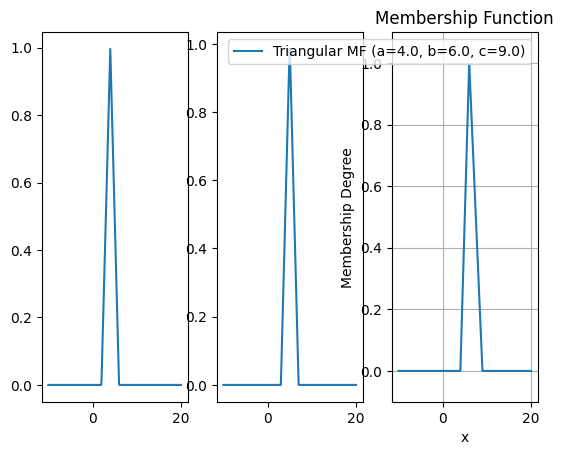


Select the membership function to plot:
1: Triangular
2: Trapezoidal
3: Gaussian
4: Generalized Bell
5: Exit
Exiting the program.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def triangular_mf(x, a, b, c):
    if not (a <= b <= c):
        raise ValueError("Invalid input a <= b <= c ")
    elif x<=a or x>=c:
        return 0
    elif a<x<b:
        return (x-a)/(b-a)
    elif b<=x<c:
        return (c-x)/(c-b)
    else:
        return 0

def trapezoidal_mf(x, a, b, c, d):
    if not (a <= b <= c <= d):
        raise ValueError("Invalid input a <= b <= c <= d")
    elif x<=a or d<=x:
        return 0
    elif a<=x<=b:
        return (x-a)/(b-a)
    elif b<=x<=c:
        return 1
    elif c<=x<=d:
        return (d-x)/(d-c)
    else:
        return 0

def gaussian_mf(x, mean, sigma):
    if sigma <= 0:
        raise ValueError("Sigma must be positive")
    return np.exp(-0.5 * ((x - mean) / sigma) ** 2)



def bell_mf(x, a, b, c):
    return 1 / (1 + abs((x - c) / a) ** (2 * b))

def plot_membership_function(choice):
    x = np.linspace(-10, 20, 500)

    if choice == 1:
        for i in range(3):
            a = float(input("Enter value for a (start of the triangle): "))
            b = float(input("Enter value for b (peak of the triangle): "))
            c = float(input("Enter value for c (end of the triangle): "))
            y = [triangular_mf(x_term, a, b, c) for x_term in x]
            plt.subplot(1,3,i+1)
            plt.plot(x, y, label=f'Triangular MF (a={a}, b={b}, c={c})')

    elif choice == 2:
        a = float(input("Enter value for a (start of the trapezoid): "))
        b = float(input("Enter value for b (start of the top plateau): "))
        c = float(input("Enter value for c (end of the top plateau): "))
        d = float(input("Enter value for d (end of the trapezoid): "))
        y = [trapezoidal_mf(x_term, a, b, c, d) for x_term in x]
        plt.plot(x, y, label=f'Trapezoidal MF (a={a}, b={b}, c={c}, d={d})')

    elif choice == 3:
        mean = float(input("Enter the mean of the Gaussian function: "))
        sigma = float(input("Enter the standard deviation (sigma): "))
        y = gaussian_mf(x, mean, sigma)
        plt.plot(x, y, label=f'Gaussian MF (mean={mean}, sigma={sigma})')

    elif choice == 4:
        a = float(input("Enter value for a (controls the width): "))
        b = float(input("Enter value for b (controls the slope): "))
        c = float(input("Enter value for c (center of the curve): "))
        y = bell_mf(x, a, b, c)
        plt.plot(x, y, label=f'Bell MF (a={a}, b={b}, c={c})')

    plt.title('Membership Function')
    plt.xlabel('x')
    plt.ylabel('Membership Degree')
    plt.ylim(-0.1, 1.1)
    plt.grid(True)
    plt.legend()
    plt.show()

def menu():
    while True:
        print("\nSelect the membership function to plot:")
        print("1: Triangular")
        print("2: Trapezoidal")
        print("3: Gaussian")
        print("4: Generalized Bell")
        print("5: Exit")

        choice = int(input("Enter your choice (1-5): "))

        if choice == 5:
            print("Exiting the program.")
            break
        elif choice in [1, 2, 3, 4]:
            plot_membership_function(choice)
        else:
            print("Invalid choice. Please select a number between 1 and 5.")

menu()